In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
df = load_breast_cancer()

In [7]:
x = df['data']
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=777, stratify=y)

모델학습

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier( criterion='entropy' ) # criterion default = gini
dtc.fit(x_train, y_train)
dtc.score(x_train, y_train), dtc.score(x_test, y_test)

(1.0, 0.951048951048951)

In [14]:
from sklearn.tree import export_graphviz
from graphviz import Source

In [12]:
export_graphviz(dtc, out_file = 'models/breat-cancer-model.dot',
                class_names = df['target_names'],
                feature_names = df['feature_names'],
                 filled = True )

In [ ]:
from graphviz import Source

# DOT 파일을 읽고 그래프를 시각화
with open('models/breat-cancer-model.dot', 'r') as f:  # 파일명 오타 수정
    tree_graph_data = f.read()

# Graphviz 소스를 생성하고 그래프를 렌더링
Source(tree_graph_data)

In [ ]:
from graphviz import Source

# DOT 파일을 읽고 그래프를 시각화
with open('models/breat-cancer-model.dot', 'r') as f:  # 파일명 오타 수정
    tree_graph_data = f.read()

# Graphviz 소스를 생성하고 그래프를 렌더링
graph = Source(tree_graph_data)
graph.view()  # 기본 뷰어에서 그래프를 엽니다.


In [47]:
dtc2 = DecisionTreeClassifier(min_samples_leaf= 5, random_state= 777 )
dtc2.fit(x_train, y_train)
dtc2.score(x_train, y_train), dtc2.score(x_test, y_test)

(0.9859154929577465, 0.9370629370629371)

In [50]:
for fn, fi in zip(df['feature_names'], dtc2.feature_importances_):
    print("{0} : {1}".format(fn, fi))

mean radius : 0.0
mean texture : 0.05268485524736746
mean perimeter : 0.0
mean area : 0.0
mean smoothness : 0.0
mean compactness : 0.0
mean concavity : 0.0013997525789455568
mean concave points : 0.0
mean symmetry : 0.0013497614154117873
mean fractal dimension : 0.0
radius error : 0.008060736669091545
texture error : 0.0
perimeter error : 0.0
area error : 0.0
smoothness error : 0.0020176121157457396
compactness error : 0.0
concavity error : 0.0
concave points error : 0.0
symmetry error : 0.0
fractal dimension error : 0.0
worst radius : 0.7189209043040128
worst texture : 0.035543504313724356
worst perimeter : 0.0
worst area : 0.0
worst smoothness : 0.0
worst compactness : 0.0
worst concavity : 0.03391708172060377
worst concave points : 0.12557521010593878
worst symmetry : 0.020530581529158164
worst fractal dimension : 0.0


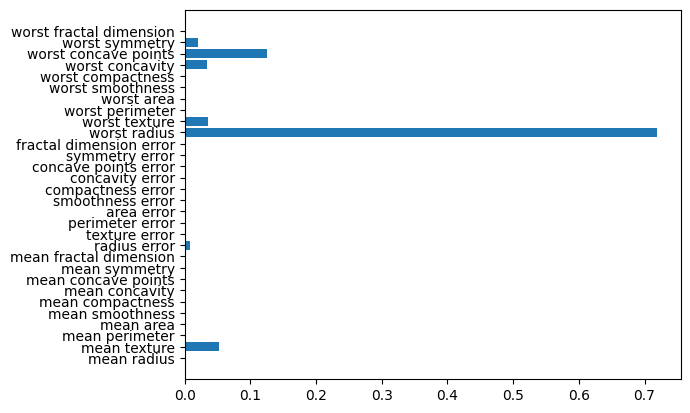

In [51]:
plt.barh(df['feature_names'], dtc2.feature_importances_)
plt.show()